# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt


---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

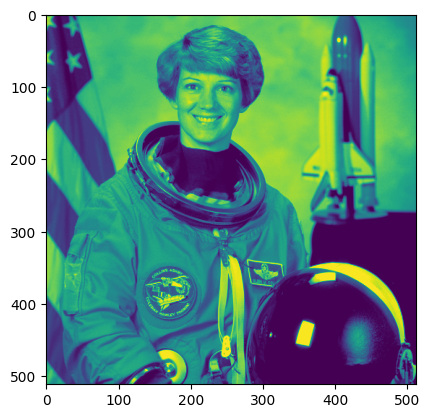

In [5]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

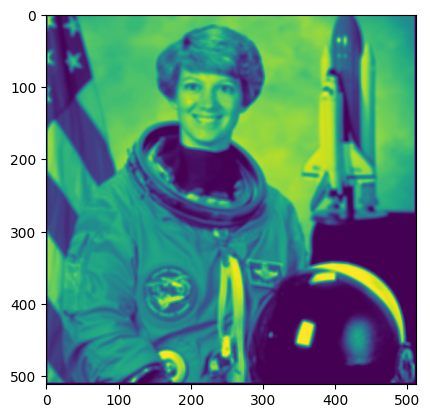

In [19]:
def meanfilter(img_in, size):

    result = np.zeros(img_in.shape)

    n = (size - 1) // 2

    for p in np.ndindex(img_in.shape):
        neighborhood_sum = 0
        Anzahl  = 0
        if p[0] >= n and p[1] >= n and p[0] < img_in.shape[0] - n and p[1] < img_in.shape[1] -n :
          
            for q in np.ndindex(size, size):
                i = (p[0] + q[0]) - n
                j = (p[1] + q[1]) - n
                neighborhood_sum += img_in[i,j]
                Anzahl += 1
            result[p] = neighborhood_sum / Anzahl
            
    return result

img_2 = img.copy()
image_mean = meanfilter(img_2, size=5)
plt.imshow(image_mean)

In [ ]:
(p[0]+q[0],p[1]+q[1])

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

In [ ]:
img_2 = img.copy()

meanfilter(img_2, size= 3)

n = (size - 1) // 2

for p in np.ndindex(img_in.shape):
    neighborhood_sum = 0
    Anzahl  = 0
    if p[0] >= n and p[1] >= n and p[0] < img_in.shape[0] - n and p[1] < img_in.shape[1] -n :
          
        for q in np.ndindex(size, size):
            i = (p[0] + q[0]) - n
            j = (p[1] + q[1]) - n
            neighborhood_sum += img_in[i,j]
            Anzahl += 1
        result[p] = neighborhood_sum / Anzahl
    
    return result

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.60348600e-01, 4.75817006e-01, ...,
        4.67538128e-01, 4.63616560e-01, 0.00000000e+00],
       [0.00000000e+00, 6.91067553e-01, 6.37472782e-01, ...,
        4.65795209e-01, 4.62745100e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 6.78867122e-01, 6.70588255e-01, ...,
        1.00217869e-02, 4.35729873e-04, 0.00000000e+00],
       [0.00000000e+00, 6.74074094e-01, 6.61437929e-01, ...,
        3.79084972e-02, 8.71459747e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [23]:
img_2 = img.copy()
image_mean = meanfilter(img_2, size=5)
assert np.allclose(image_mean, plt.imread('data/astronaut_meanfilter5.png'), atol = 1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [ ]:
def medianfilter(img_in, size):
    result = np.zeros(img_in.shape)

    n = (size - 1) // 2

    for p in np.ndindex(img_in.shape):
        median_list = []
        
        if p[0] >= n and p[1] >= n and p[0] < img_in.shape[0] - n and p[1] < img_in.shape[1] -n :
            
            for q in np.ndindex(size, size):
                i = (p[0] + q[0]) - n
                j = (p[1] + q[1]) - n
                median_list.append(img_in[i,j])
                median_list.sort()
                m = len(median_list)
                if m % 2 ==0:
                    median = (median_list[m // 2 - 1]+ median_list[m // 2]) / 2
                else:
                    median = median_list[m // 2]
            result[p] = median
        
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

In [40]:
img_2 = img.copy()

medianfilter(img_2, size= 3)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57058823, 0.43529412, ..., 0.46862745, 0.45882353,
        0.        ],
       [0.        , 0.68627453, 0.63137257, ..., 0.46470588, 0.46078432,
        0.        ],
       ...,
       [0.        , 0.67647064, 0.67254901, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.67254901, 0.66470587, ..., 0.00196078, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [45]:
img_2 = img.copy()
image_median = medianfilter(img_2, size=5)
assert np.allclose(image_median, plt.imread('data/astronaut_medianfilter5.png'), atol = 1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [46]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

In [51]:
img_2 = img.copy() 
img_sc_uniform = scipy.ndimage.uniform_filter(img_2, 5)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

In [52]:
img_2 = img.copy()
img_sc_median = scipy.ndimage.median_filter(img_2, 5)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

In [53]:
img_2 = img.copy()
img_sc_gauss = scipy.ndimage.gaussian_filter(img_2, sigma=1)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Die Ränder der Bilder sind unterschiedlich; bei unseren eigenen Filtern gibt es schwarze ränder

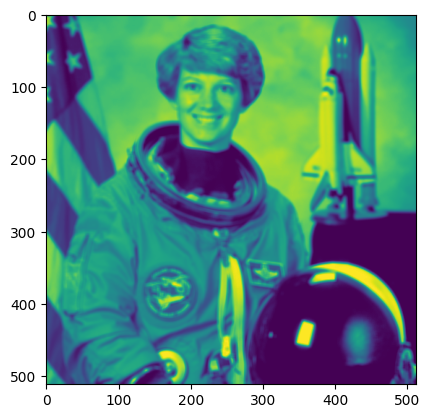

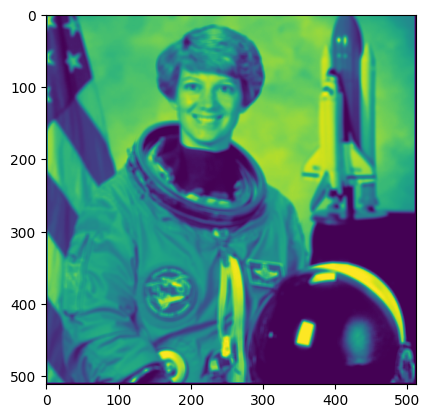

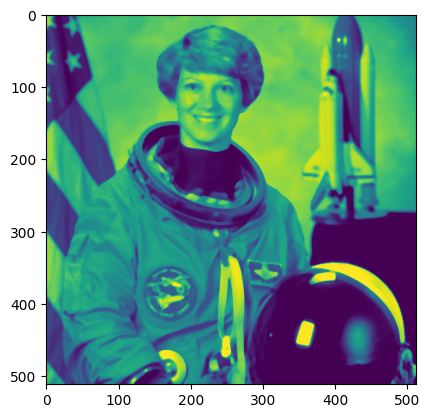

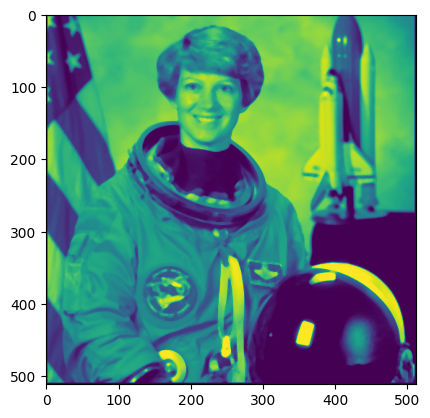

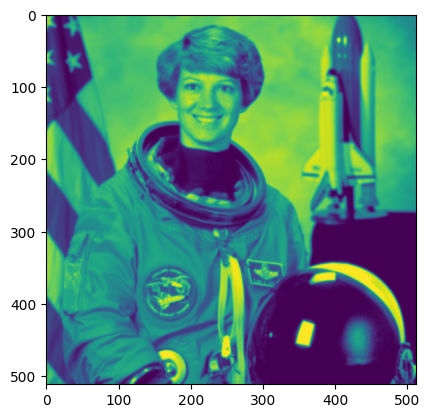

In [62]:
plt.figure()
plt.imshow(img_sc_uniform)

plt.figure()
plt.imshow(plt.imread('data/astronaut_meanfilter5.png'))

plt.figure()
plt.imshow(img_sc_median)

plt.figure()
plt.imshow(plt.imread('data/astronaut_medianfilter5.png'))

plt.figure()
plt.imshow(img_sc_gauss)

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    result = np.zeros(img_in.shape)

    n = (size - 1) // 2

    for p in np.ndindex(img_in.shape):
        median_list = []
        
        if p[0] >= n and p[1] >= n and p[0] < img_in.shape[0] - n and p[1] < img_in.shape[1] -n :
            
            for q in np.ndindex(size, size):
                i = (p[0] + q[0]) - n
                j = (p[1] + q[1]) - n
                median_list.append(img_in[i,j])
                median_list.sort()
                m = len(median_list)
                if m % 2 ==0:
                    median = (median_list[m // 2 - 1]+ median_list[m // 2]) / 2
                else:
                    median = median_list[m // 2]
            result[p] = median
        
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: